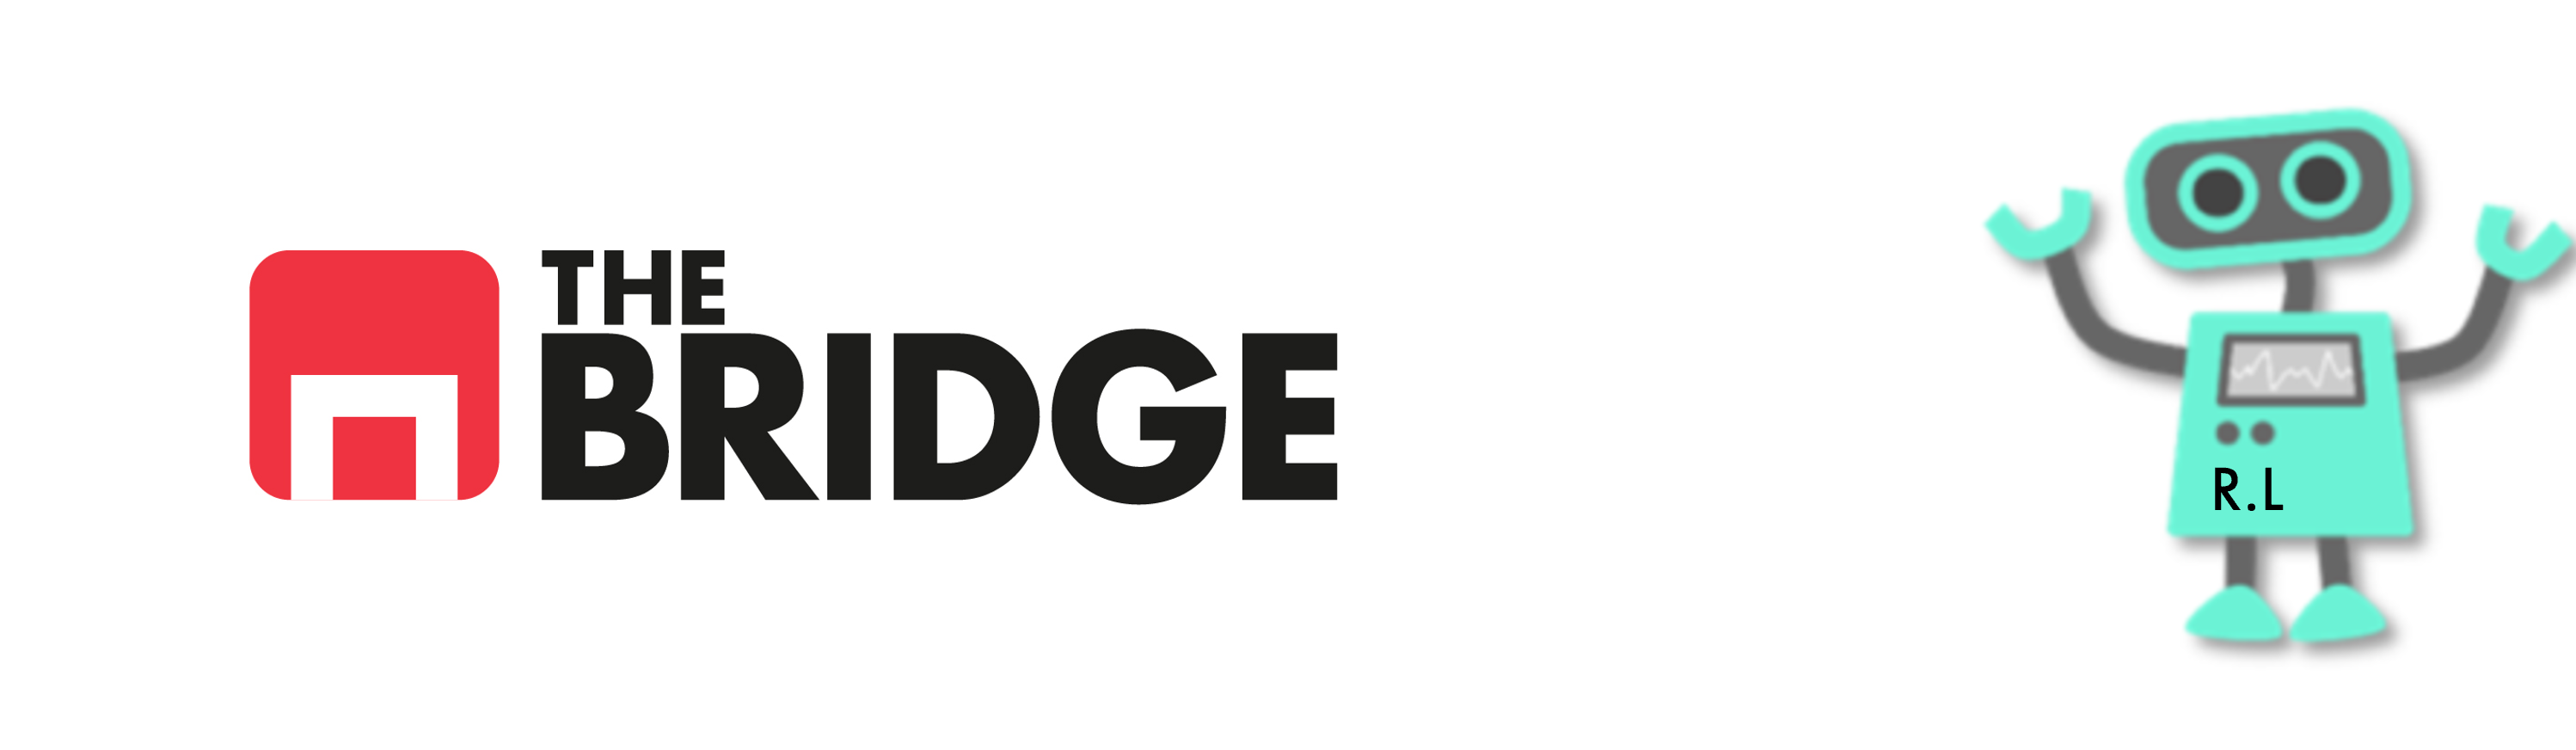

* [**Datos de partida**](#**Datos-de-partida**)  

* [**Código a completar**](#**Código-a-completar**)  



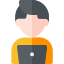 **EJERCICIO COMPLETAR CODIGO**

## SMARTCAB, mejorando una estrategia nada óptima

El siguiente código mejora ligeramente las prestaciones de nuestro SmartCab sin algoritmo de aprendizaje por refuerzo. Para ello, añadimos una pequeña pero útil comprobación: no intentaremos hacer recogidas de pasajeros en los puntos que no son de recogida, ni intentaremos dejar al pasajero en puntos que no son el destino. 

Revisa y completa el código de forma que se ejecute sin errores y comprueba que la solución final tiene 0 penalties y además el número de epochs es sensiblemente menor a 2800.



**IMPORTANTE:** Si lo prefieres, descargarte el notebook (File -> Download as -> Notebook) y complétalo en local, pero en ese caso tendrás que instalarte (via pip o conda) las librerias necesarias


### **Datos de partida**  

[al indice](#Contenidos)  



Para hacer el ejercicio necesitas conocer los valores de las observaciones. 

Si ejecutas:
observations = list(env.decode(state)), donde state contiene el estado del entorno, observations es una lista de valores con las observaciones:  
observations[0] = Fila de la posición del taxi (valor x)  
observations[1] = Columna de la posición del taxi (valor y)  
observations[2] = Estado del pasajero, (0-3, las posiciones R,G,B o Y, 4, está en el taxi)   
observations[3] = Posición de destino (0-3, para las posciones R,G,B o Y)  

Además las localizaciones de los puntos de recogida/destino son:  
(0,0), posicion 0  
(0,4), posicion 1  
(4,0), posicion 2  
(4,3), posicion 3  


### **Código a completar**  

[al indice](#Contenidos)  



In [4]:
import gym

env = gym.make("Taxi-v3", render_mode="ansi").env

penalties, reward, epochs = 0, 0, 0 # Inicializa las variables que llevaran las métricas del "entrenamiento"
simulated_time = 0

done = False

def es_destino_o_recogida(state_index):
    # Obtiene las observaciones correspondientes al indice indicado en state_index
    observations = list(env.decode(state_index))
    
    # Extraer la fila y la columna del taxi
    taxi_row, taxi_col = observations[0], observations[1]
    
    # Extraer índice de ubicación del pasajero y índice de destino
    passenger_index, destination_index = observations[2], observations[3]
    
    # Ubicaciones codificadas como (fila, columna) para los índices 0, 1, 2, y 3
    locations = [(0, 0), (0, 4), (4, 0), (4, 3)]

    # Verificar si la posición del taxi coincide con la ubicación de recogida o la ubicación de destino
    es_el_punto_de_recogida = (taxi_row, taxi_col) == locations[passenger_index] if passenger_index < 4 else False
    es_el_punto_de_destino = (taxi_row, taxi_col) == locations[destination_index] if passenger_index == 4 else False
    
    return 1 if es_el_punto_de_destino else 2 if es_el_punto_de_recogida else 0

for episode in range(100): # Jugamos 100 episodios y haremos las medias de las metricas de cada uno de ellos
    state, info = env.reset() # Reset the environment to start a new episode
    done = False
    while not done:
        action = env.action_space.sample() # Escoge una acción de forma aleatoria

        # Comprueba si la acción es dejar y el pasajero no está en el taxi
        if action == 5 and es_destino_o_recogida(state) != 1:
            continue # Este comando hace que se salte todo lo demás y comience el bucle de nuevo, es decir no se actualizan contadores
        
        # Comprueba si la acción es recoger y la localización no es un punto de recogida o el pasajero no está en un punto de recogida
        if action == 4 and es_destino_o_recogida(state) != 2:
            continue # Este comando hace que se salte todo lo demás y comience el bucle de nuevo, es decir no se actualizan contadores
        
        if action < 4:
            simulated_time += 45
        else:
            simulated_time += 75
        
        state, reward, done, truncated, info = env.step(action) # Ejecuta la acción
        if reward == -10: # Si se equivoca en recogidas o dejadas, añade uno al contador de penalizaciones
            penalties += 1

        epochs += 1

print("Número medio de acciones ejecutadas por episodio: {}".format(epochs/100))
print("Número medio de penalizaciones por episodio: {}".format(penalties/100))
print("Tiempo medio simulado por episodio: {}".format(simulated_time/100))


Número medio de acciones ejecutadas por episodio: 593.25
Número medio de penalizaciones por episodio: 0.0
Tiempo medio simulado por episodio: 26756.25
